# Skip Lists

TODO: Introduce skip lists

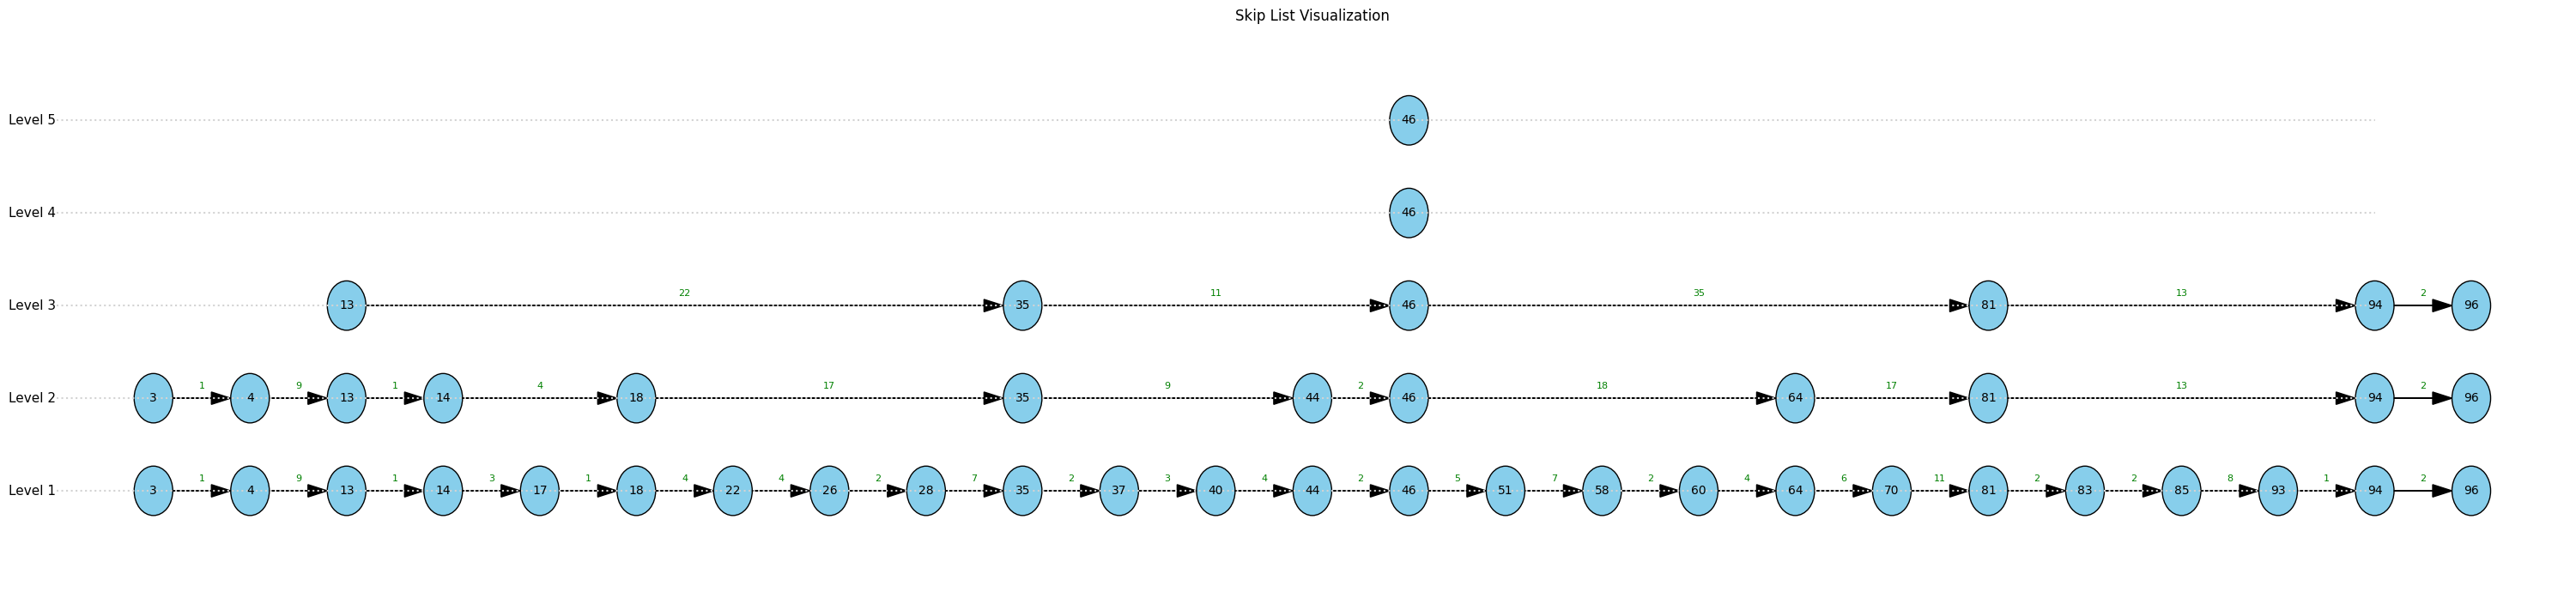

In [8]:
import random
import matplotlib.pyplot as plt

class Node:
   def __init__(self, value, level):
        self.value = value
        self.forward = [None] * (level + 1)

class SkipList:
    def __init__(self, max_level=6, p=0.5):
        self.max_level = max_level
        self.p = p
        self.header = Node(None, self.max_level)
        self.level = 0

    def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.max_level:
            lvl += 1
        return lvl

    def insert(self, value):
        update = [None] * (self.max_level + 1)
        current = self.header

        for i in reversed(range(self.level + 1)):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]

        if current is None or current.value != value:
            rlevel = self.random_level()

            if rlevel > self.level:
                for i in range(self.level + 1, rlevel + 1):
                    update[i] = self.header
                self.level = rlevel

            new_node = Node(value, rlevel)
            for i in range(rlevel + 1):
                new_node.forward[i] = update[i].forward[i]
                update[i].forward[i] = new_node

    def get_visual_nodes(self):
        nodes = []
        node = self.header.forward[0]
        while node:
            nodes.append(SkipListNode(node.value, len(node.forward)))
            node = node.forward[0]
        return nodes

# Visual Node for plotting
class SkipListNode:
    def __init__(self, value, levels):
        self.value = value
        self.levels = levels

def draw_skip_list(nodes, max_level):
    x_offset = 2
    fig, ax = plt.subplots(figsize=(max(12, len(nodes) * 1.2), 2 + max_level))

    x_gap = 2
    y_gap = 1.5
    radius = 0.4

    for lvl in range(max_level, 0, -1):
        ax.hlines(y=lvl * y_gap, xmin=0, xmax=x_gap * (len(nodes)-1), colors='lightgray', linestyles='dotted')
        ax.text(-1, lvl * y_gap, f"Level {lvl}", verticalalignment='center', fontsize=11)

    node_positions = {}
    for i, node in enumerate(nodes):
        x = i * x_gap + x_offset
        for lvl in range(1, node.levels + 1):
            y = lvl * y_gap
            circle = plt.Circle((x, y), radius, color='skyblue', ec='black')
            ax.add_patch(circle)
            ax.text(x, y, str(node.value), fontsize=10, ha='center', va='center')
            node_positions[(i, lvl)] = (x, y)

    for lvl in range(1, max_level + 1):
        last = None
        for i in range(len(nodes)):
            if (i, lvl) in node_positions:
                if last is not None:
                    x1, y1 = node_positions[last]
                    x2, y2 = node_positions[(i, lvl)]
                    ax.arrow(x1 + radius, y1, x2 - x1 - 2 * radius, 0,
                             head_width=0.2, head_length=0.4, length_includes_head=True, color='black')
                    # Label the skip
                    val1 = nodes[last[0]].value
                    val2 = nodes[i].value
                    mid_x = (x1 + x2) / 2
                    ax.text(mid_x, y1 + 0.15, f"{val2 - val1}", fontsize=8, ha='center', color='green')
                last = (i, lvl)

    ax.set_xlim(0, x_offset + x_gap * (len(nodes) - 1) + 2)
    ax.set_ylim(0, (max_level + 1) * y_gap)
    ax.axis('off')
    plt.title("Skip List Visualization")
    plt.tight_layout()
    plt.show()

sl = SkipList(max_level=6)
values = sorted(random.sample(range(1, 100), 25))
for val in values:
    sl.insert(val)

visual_nodes = sl.get_visual_nodes()
max_level = max(node.levels for node in visual_nodes)
draw_skip_list(visual_nodes, max_level)